## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import numpy as np
%matplotlib inline

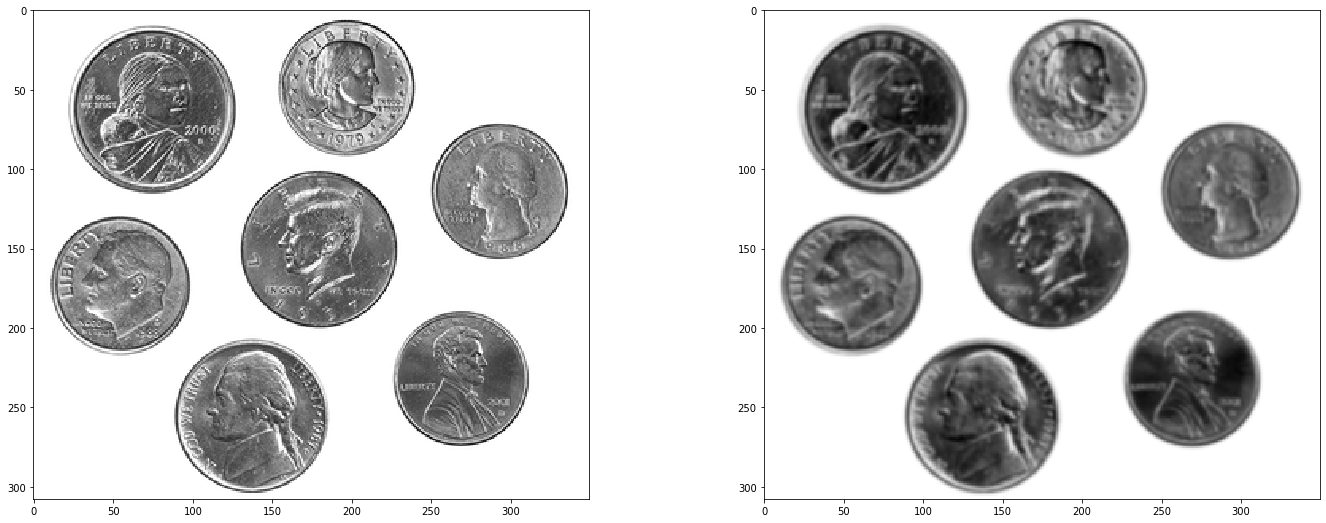

In [2]:
f, plts = plt.subplots(1, 2, figsize=(24,9))


# load the image, convert it to grayscale, and blur it slightly
image = np.asarray(Image.open("img/coins01.png"))
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #TODO: Convert to grayscale
blurred = cv2.GaussianBlur(gray, (7,7), 1) #TODO: Apply Gaussian blur with 7x7 kernel

# show the original and blurred images
plts[0].imshow(gray, cmap='gray');
plts[1].imshow(blurred, cmap='gray');

# 1. Thresholding

## 1.1. Manual thresholding

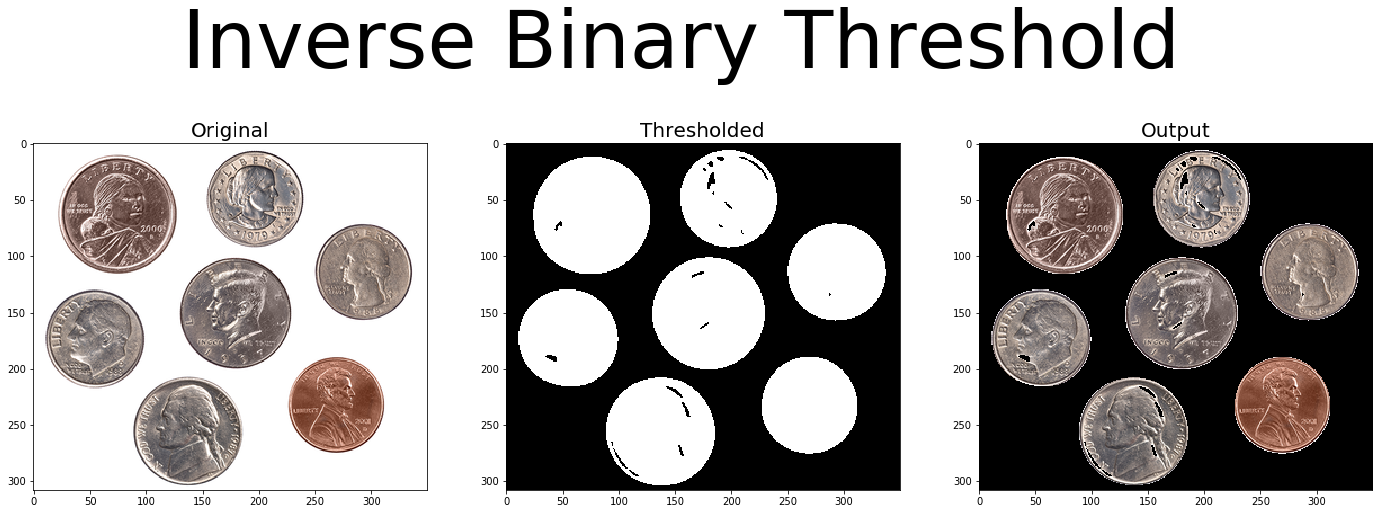

In [67]:
# apply basic thresholding -- the first parameter is the image
# we want to threshold, the second value is our threshold
# check; if a pixel value is greater than our threshold (in this
# case, 200), we set it to be BLACK, otherwise it is WHITE.
# T = our defined threshold
(T, threshInv) =  #TODO: Apply inverse binarization

### Plotting
plt.figure(figsize=(24,9))
# plt.tight_layout()
plt.suptitle("Inverse Binary Threshold", fontsize=80)
plt.subplot(131)
plt.title("Original", fontsize=20)
plt.imshow(image)

plt.subplot(132)
plt.title("Thresholded", fontsize=20)
plt.imshow(threshInv, cmap='gray');

# finally, we can visualize only the masked regions in the image
plt.subplot(133)
plt.title("Output", fontsize=20)
plt.imshow(cv2.bitwise_and(image, image, mask=threshInv));

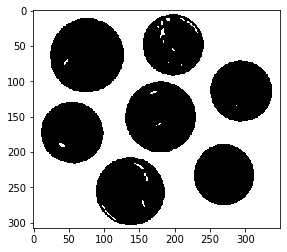

In [68]:
# using normal thresholding (rather than inverse thresholding),
# we can change the last argument in the function to make the coins
# black rather than white.
(T, thresh) = #TODO: Apply binarization
plt.imshow(thresh, cmap='gray');

## 1.2. Otsu's thresholding

Otsu's thresholding value: 188.0
Image mean intensity: 198.24487940630797


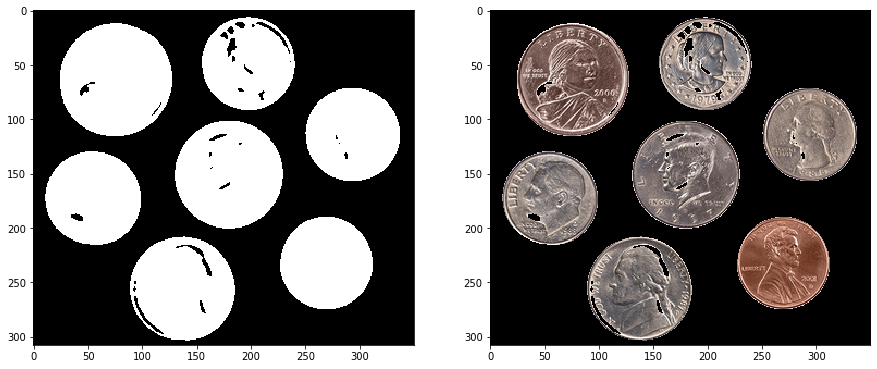

In [69]:
# apply Otsu's automatic thresholding -- Otsu's method automatically
# determines the best threshold value `T` for us
f, plts = plt.subplots(1, 2, figsize=(15, 10))
(T, threshInv) = #TODO: Apply inverse binary and Otsu threshold

plts[0].imshow(threshInv, cmap='gray')
print("Otsu's thresholding value: {}".format(T))
print("Image mean intensity: {}".format(np.mean(blurred)))

# finally, we can visualize only the masked regions in the image
plts[1].imshow(cv2.bitwise_and(image, image, mask=threshInv));

## 1.3. Adaptive thresholding

Using OpenCV function:

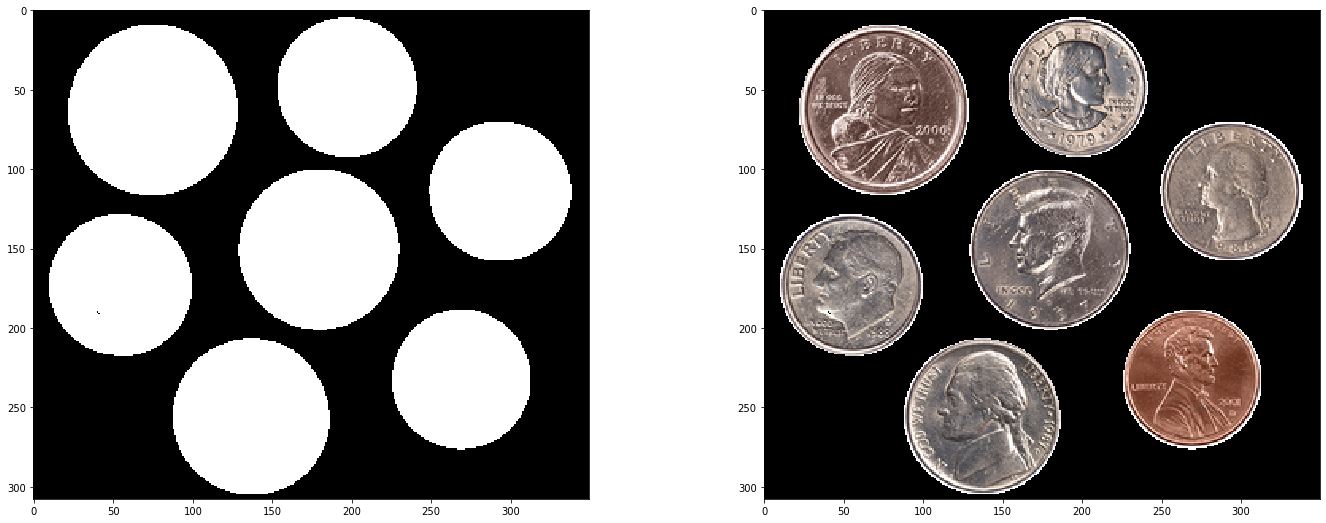

In [70]:
f, plts = plt.subplots(1, 2, figsize=(24,9))

# instead of manually specifying the threshold value, we can use adaptive
# thresholding to examine neighborhoods of pixels and adaptively threshold
# each neighborhood -- in this example, we'll calculate the mean value
# of the neighborhood area of 25 pixels and threshold based on that value;
# finally, our constant C is subtracted from the mean calculation (in this
# case 15)
thresh = #TODO: Apply adaptive inverse binarization

plts[0].imshow(thresh, cmap='gray');

# finally, we can visualize only the masked regions in the image
plts[1].imshow(cv2.bitwise_and(image, image, mask=thresh));

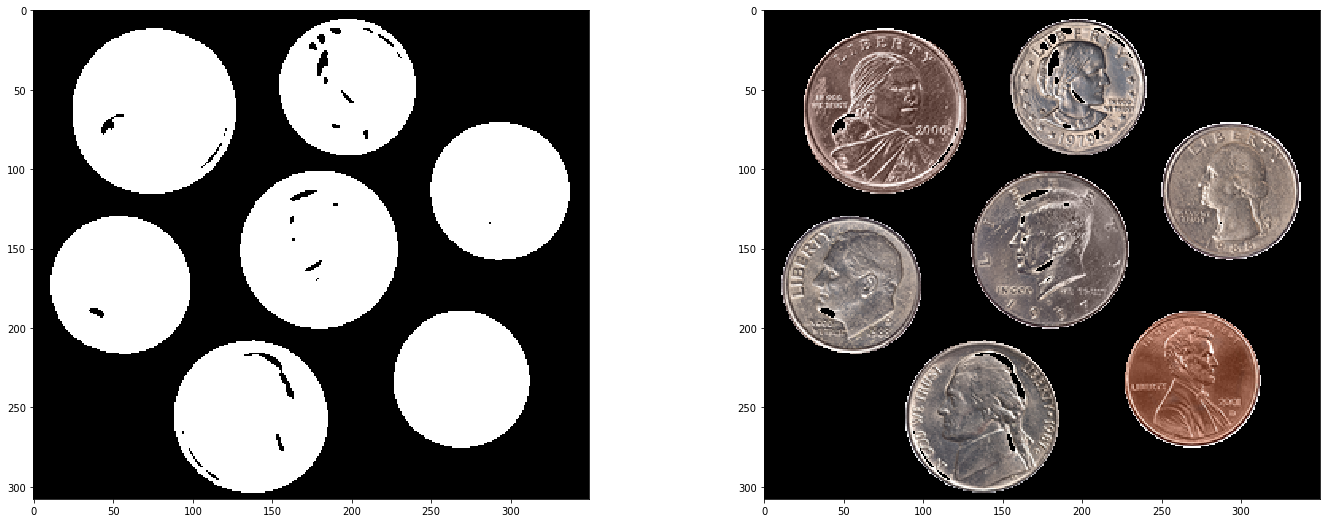

In [71]:
f, plts = plt.subplots(1, 2, figsize=(24,9))


# The scikit-image adaptive thresholding just
# feels a lot more "Pythonic"

from skimage.filters import threshold_local

T = threshold_local(blurred, 433, offset=0, method="gaussian")
thresh = (blurred < T).astype("uint8") * 255

plts[0].imshow(thresh, cmap='gray')

# finally, we can visualize only the masked regions in the image
plts[1].imshow(cv2.bitwise_and(image, image, mask=thresh));

# 2. Gradients

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Maximum absolute value of gX: 874.0, gY: 940.0, magnitude (before normalization): 961.9667353916143, and orientation: 179.9177966424675


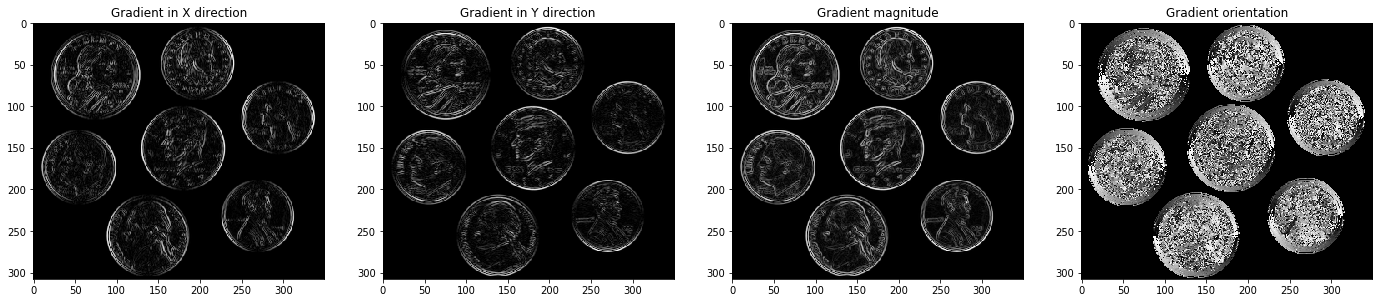

In [82]:
f, plts = plt.subplots(1, 4, figsize=(24,20))

# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = #TODO: Calculate y gradient of the gray image

# compute the gradient magnitude and orientation, respectively
# For optimisation we could use just weighted sum.
# sobelCombined = cv2.addWeighted(np.absolute(gX), 0.5, np.absolute(gY), 0.5, 0)
mag = #TODO: Calculate magnitudes of gradients
orientation = #TODO: Calculate orientations of gradients

print("Maximum absolute value of gX: {}, gY: {}, magnitude (before normalization): {}, and orientation: {}".format(
                                                                      np.max(np.absolute(gX)),
                                                                      np.max(np.absolute(gY)),
                                                                      np.max(mag),
                                                                      np.max(orientation)))

# normalize values of the gradient magnitudes, since
# cv2.convertScaleAbs and simple np.uint8 will only clip
# mag values to [0..255] scale, so use manual method 
mag = np.uint8(255*mag/np.max(mag))

plts[0].imshow(np.absolute(gX), cmap='gray'),plts[0].set_title("Gradient in X direction")
plts[1].imshow(np.absolute(gY), cmap='gray'),plts[1].set_title("Gradient in Y direction")
plts[2].imshow(mag, cmap='gray'),plts[2].set_title("Gradient magnitude")
# gradient directions are inverted because y axis is facing down
plts[3].imshow(orientation, cmap='gray'),plts[3].set_title("Gradient orientation");

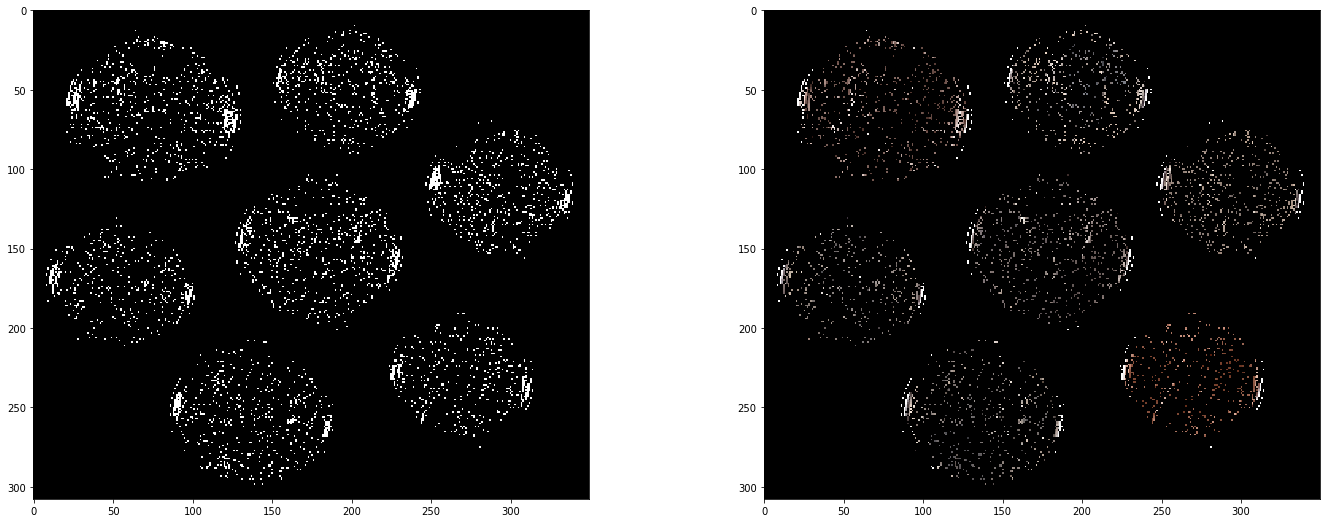

In [73]:
f, plts = plt.subplots(1, 2, figsize=(24,9))


# find all pixels that are within the upper and low angle boundaries
lower_angle = 1.0
upper_angle = 15.0

idxs = np.where(orientation >= lower_angle, orientation, -1)
idxs = np.where(orientation <= upper_angle, idxs, -1)
mask = np.zeros(gray.shape, dtype="uint8")
mask[idxs > -1] = 255

# show the images
plts[0].imshow(mask, cmap='gray');
plts[1].imshow(cv2.bitwise_and(image,image,mask=mask));

# 3. Edge detection

## 3.1. Canny

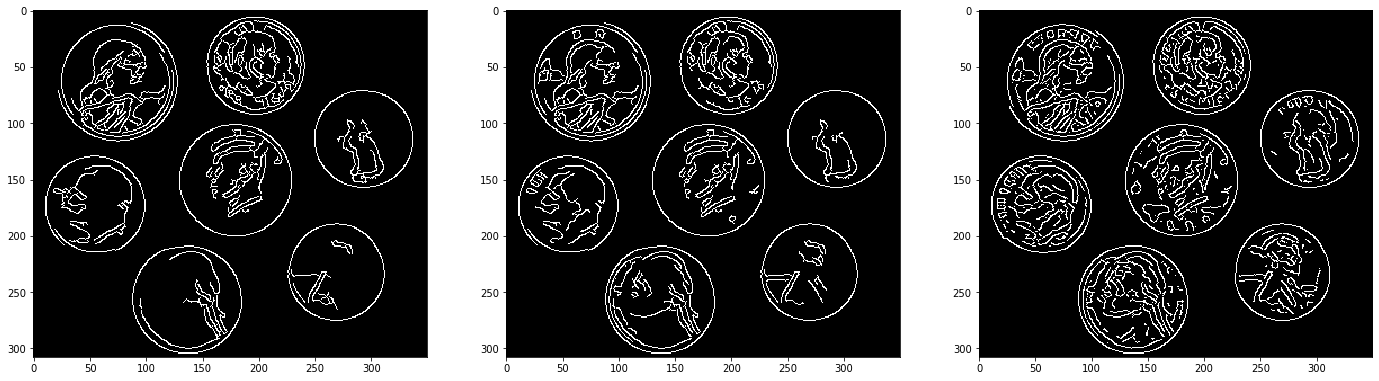

In [74]:
f, plts = plt.subplots(1, 3, figsize=(24,10))


# compute a "wide", "mid-range", and "tight" threshold for the edges
wide = #TODO: Apply Canny with wide threshold
mid = #TODO: Apply Canny with recommended threshold (upper threshold = 3x lower threshold)
#Hard to know the values of image intensities inside Canny operator 
largeAp = #TODO: Apply Canny with tight threshold and 7x7 kernel

# show the edge maps
plts[0].imshow(wide, cmap='gray') #" Wide Edge Map", 
plts[1].imshow(mid, cmap='gray') # "Mid Edge Map", 
plts[2].imshow(largeAp, cmap='gray'); # "Tight Edge Map", 

## 3.2. Auto Canny

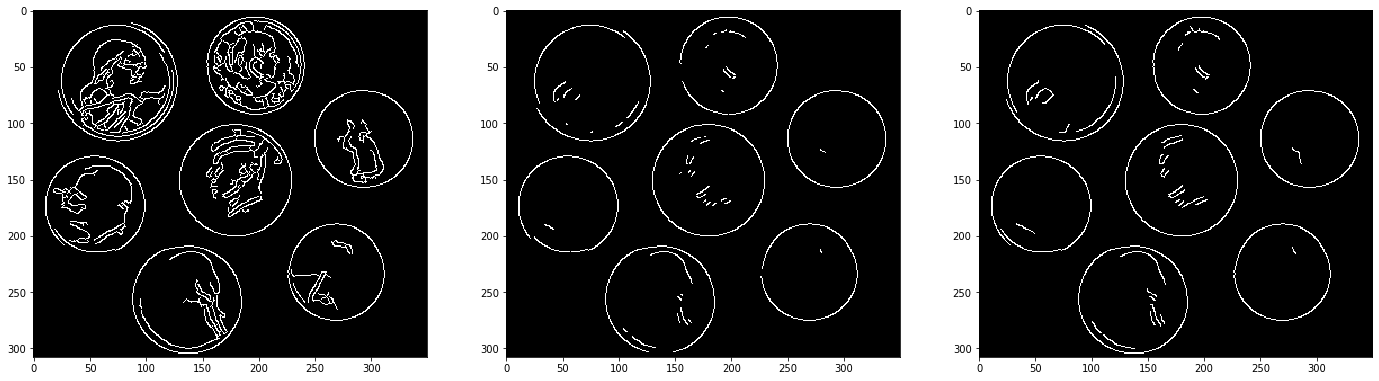

In [75]:
import imutils

f, plts = plt.subplots(1, 3, figsize=(24,10))


# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = #TODO: Apply Canny with wide threshold
tight = #TODO: Apply Canny with tight threshold
auto = imutils.auto_canny(blurred)

# show the images
plts[0].imshow(wide, cmap='gray') # "Wide", 
plts[1].imshow(tight, cmap='gray') # "Tight", 
plts[2].imshow(auto, cmap='gray'); # "Auto", 

# 4. Contours
Ref: https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]
Total coins: 7


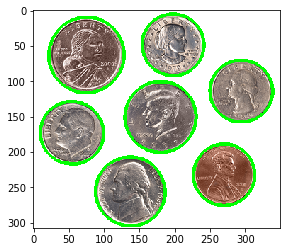

In [76]:
# Contours are better detectable on binary images
thresh = #TODO: Apply adaptive inverse threshold

contours, hierarchy = #TODO: Apply cv2.findContours with only External perimeters and APPROX_SIMPLE

out = image.copy()
#TODO: use cv2.drawContours to draw the contours :)
plt.imshow(out);
print(hierarchy)
print("Total coins: {}".format(len(contours)))

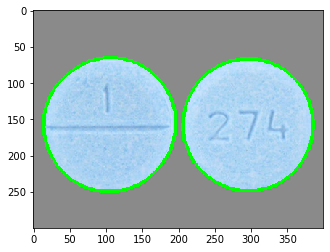

In [77]:
testImg = np.asarray(Image.open("img/clonazepam_1mg.png"))
testGray = cv2.cvtColor(testImg, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(testGray, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 433, 0)


contours, hierarchy = #TODO: Apply cv2.findContours with only External perimeters
out = testImg.copy()

#TODO: Draw the contours

len(contours)
plt.imshow(out);

# 5. Laplacian

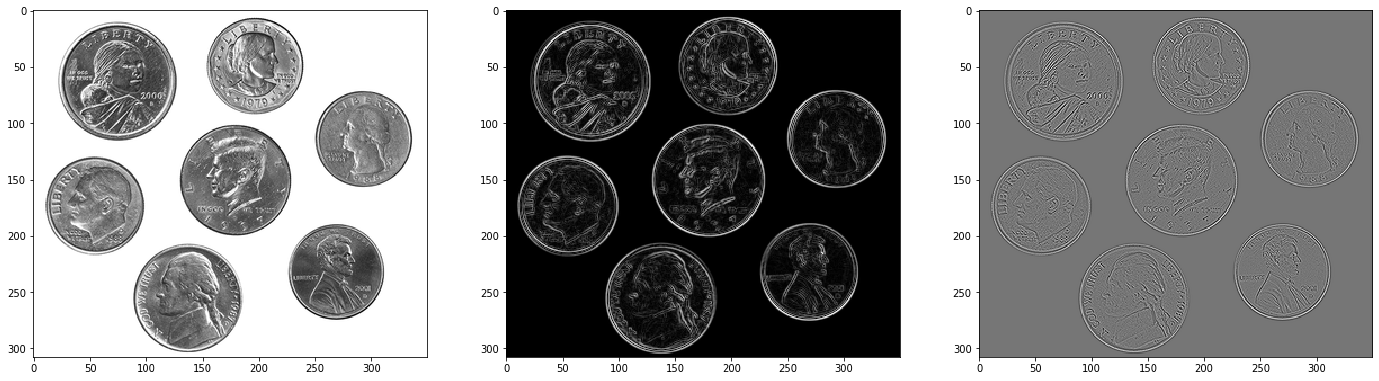

In [78]:
testImage = gray
gX = cv2.Sobel(testImage, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(testImage, cv2.CV_64F, 0, 1)
sobelCombined = cv2.addWeighted(np.absolute(gX), 0.5, np.absolute(gY), 0.5, 0)
laplacian = cv2.Laplacian(testImage, cv2.CV_64F)
canny = cv2.Canny(testImage, 50, 150)

plt.figure(figsize=(24,9))
plt.subplot(131)
plt.imshow(testImage, cmap='gray')
plt.subplot(132)
plt.imshow(sobelCombined, cmap='gray')
plt.subplot(133)
plt.imshow(laplacian, cmap='gray');

## Laplacian edge detection
1. Compute LoG

2. Compute zero crossings on LoG

3. Compute a threshold for local LoG difference

4. Edge pixels = zero crossing && local difference > threshold

Threshold: 7.80801572675661e+16


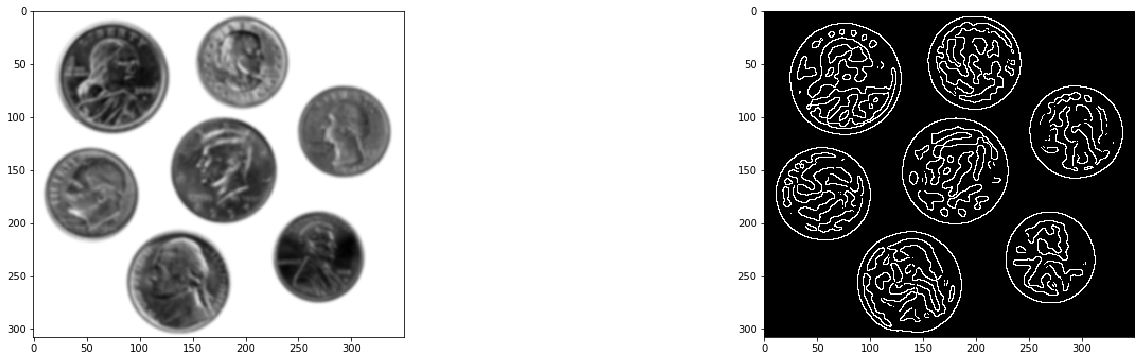

In [79]:
blurred = cv2.GaussianBlur(testImage, (7, 7), 0)

LoG = cv2.Laplacian(blurred, cv2.CV_64F, ksize=31)


thres = np.absolute(LoG).mean()*0.3
print("Threshold: {}".format(thres))

lapEdges = np.uint8(np.zeros(LoG.shape))
w = lapEdges.shape[1]
h = lapEdges.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+1, x-1:x+1]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if (abs(maxP - minP) > thres) and zeroCross:
            lapEdges[y, x] = 255
            
plt.figure(figsize=(24,6))
plt.subplot(121)
plt.imshow(blurred, cmap='gray')
plt.subplot(122)
plt.imshow(lapEdges, cmap='gray')
# cv2.imwrite('img/laplout.jpg', lapEdges);

# 6. Comparison of two edge detection algorithms
In application to detecting outer boundaries of coins using cv2.findContours()

Total coins: 36


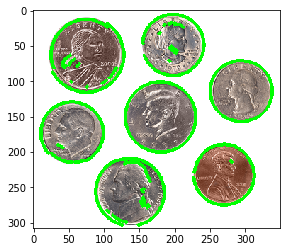

In [80]:
# On canny image
contours, hierarchy = cv2.findContours(tight, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
out = image.copy()

cv2.drawContours(out, contours, -1, (0,255,0), 3)

plt.imshow(out);
print("Total coins: {}".format(len(contours)))

We see that on broken edge contours are wrong. In Canny it is hard to tune the parameters to make good contours.

Total coins: 7


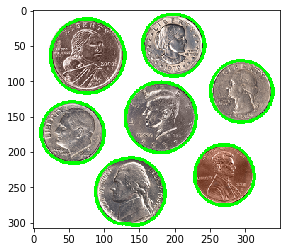

In [81]:
# On laplacian edges image
contours, hierarchy = cv2.findContours(lapEdges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
out = image.copy()

cv2.drawContours(out, contours, -1, (0,255,0), 3)

plt.imshow(out)
print("Total coins: {}".format(len(contours)))